## EDA Algerian Forest Fires Dataset

### 1) Problem statement
- Do proper EDA(analysis) of the dataset and create a report


### 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset
- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.


### 3) Dataset Information
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8 FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

### 4. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
# checking for missing values
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

- All of the columns are missing 1 value except day column that has no missing values, and classes column tha has 2 missing values

In [5]:
# checking for duplicates
df.duplicated().sum()

0

- There are no duplicate values in the dataset

In [6]:
# checking for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [7]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### Observations

- The second region dataset start from 122nd index
- We can make a new column base on Region

 **1 : "Bejaia Region Dataset"**

 **2 : "Sidi-Bel Abbes Region Dataset"**

In [8]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [11]:
# remove(drop) null or na value rows
df = df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [14]:
#remove 122th column
df= df.drop(122).reset_index(drop=True)

- Nulls and unwanted rows are removed

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

- Some columns name are misspaced.
- Let's fix column names

In [16]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


#### **Changing columns with numerical data into 'int' data type

In [19]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


#### **Changing columns with numerical data into 'float' data type

In [20]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [21]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


### Data Cleaning in target variable

In [23]:
# check unique value of target variable
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

- The values were misspaced

In [24]:
# Fixing misspaced target variable with '.strip()'
df.Classes = df.Classes.str.strip()
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

#### Region 1 (Bejaia Region)

In [25]:
region1 = df.iloc[:122]
region1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


#### Region 2 (Sidi-Bel Abbes Region)

In [26]:
region2 = df.iloc[122:]
region2.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,2
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,2
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,2
131,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire,2


### *Saving The cleaned dataset**

In [27]:
df.to_csv("Algerian_forest_fires_dataset_CLEANED.csv")

## Exploratory Data Analysis (EDA)

### Dataset Information
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8 FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

### Vizualize The Distributions

In [28]:
# Dropping year feature
df2 = df.drop(['day','month','year'], axis=1)
df2.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1


In [29]:
# Encoding Fire as 1 and not fire as 0
df2['Classes'] = np.where(df2['Classes']== 'not fire',0,1)
df2.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1


In [30]:
df2['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [31]:
percentage = df2.Classes.value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

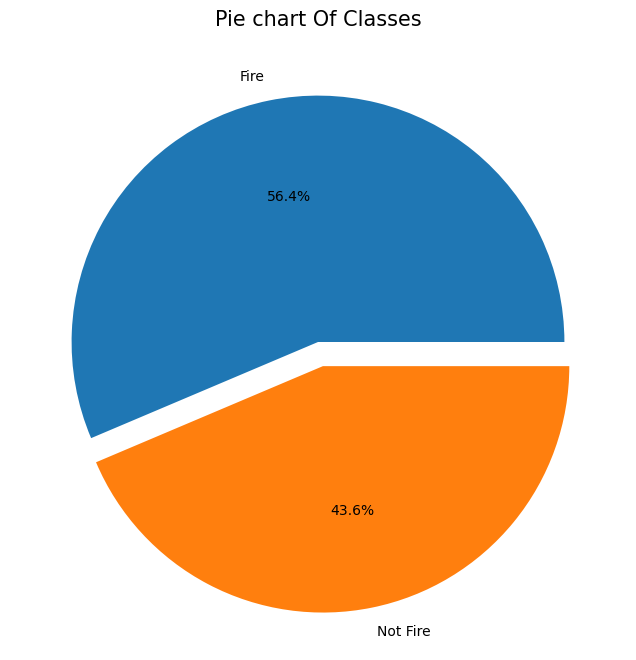

In [32]:
class_labels = ['Fire', 'Not Fire']
plt.figure(figsize=(15,8))
plt.pie(percentage, labels=class_labels, autopct="%1.1f%%", explode=[0.0,0.1])
plt.title("Pie chart Of Classes",fontsize=15);

## Observation
- There is a fire 56.4% of time and Not fire 43.6% of time

### Monthly Fire Counts

In [33]:
df['month'].unique()

array([6, 7, 8, 9])

In [34]:
months = ['June','July','August','September']

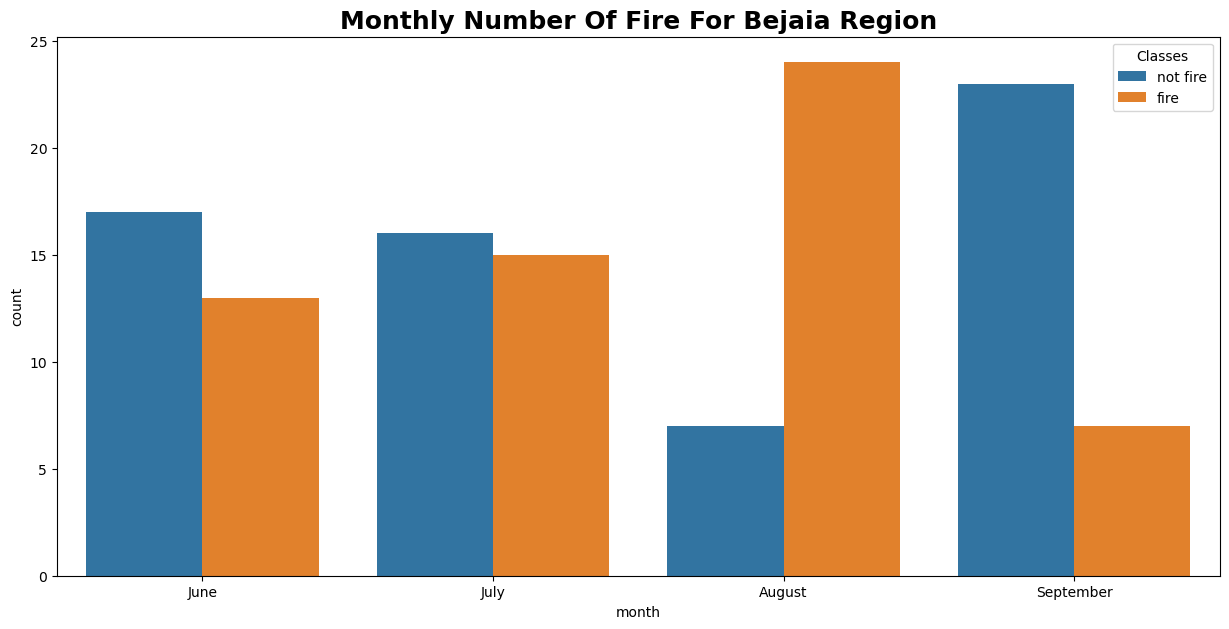

In [35]:
reg1 = df.loc[df["Region"]==1]
reg2 = df.loc[df["Region"]==2]

plt.figure(figsize=(15,7))
plt.title("Monthly Number Of Fire For Bejaia Region", fontsize=18, weight="bold")
sns.countplot(reg1, x='month',hue='Classes')
plt.xticks(np.arange(4), ['June','July','August','September']);

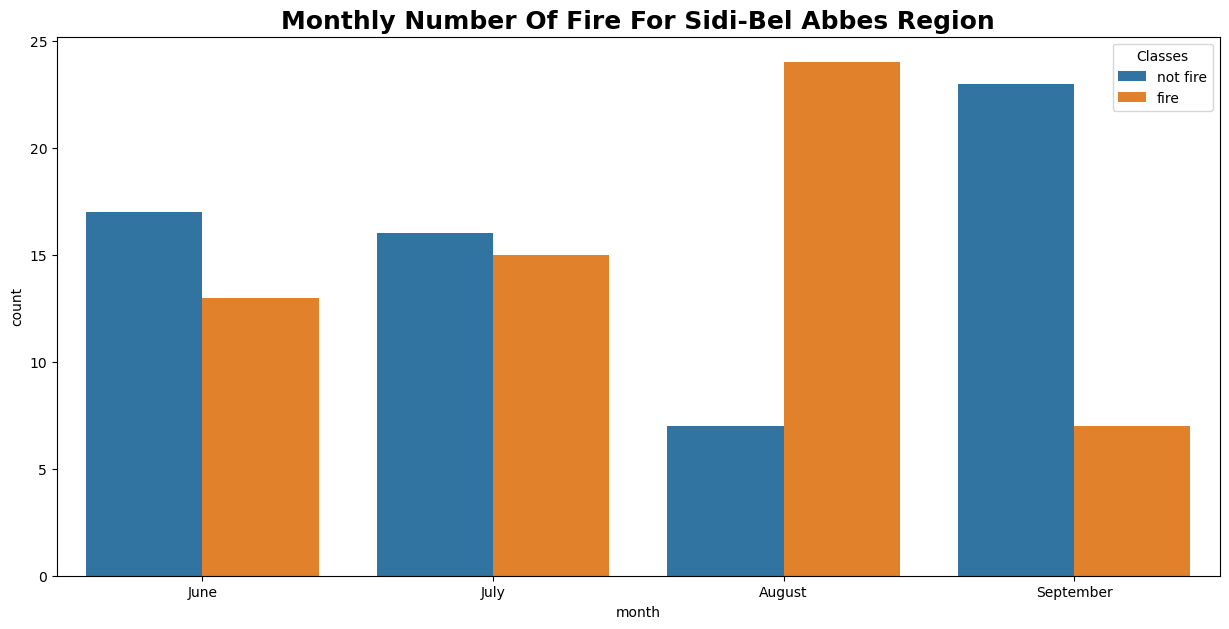

In [36]:
plt.figure(figsize=(15,7))
plt.title("Monthly Number Of Fire For Sidi-Bel Abbes Region", fontsize=18, weight="bold")
sns.countplot(reg1, x='month',hue='Classes')
plt.xticks(np.arange(4), ['June','July','August','September']);

## Observations For Both Regions

- Forest fires happenned has been observed in only 4 months, June, July, August, and September
- The month with the most number of fire is August
- The month with the lowest number of fire is September

In [37]:
df2.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [38]:
def barchart(feature,xlabel):
    plt.figure(figsize=[15,12])
    by_feature =  df2.groupby([feature], as_index=False)['Classes'].sum()
    sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    plt.xlabel(xlabel)
    plt.ylabel('Fire Count')

### Temperature

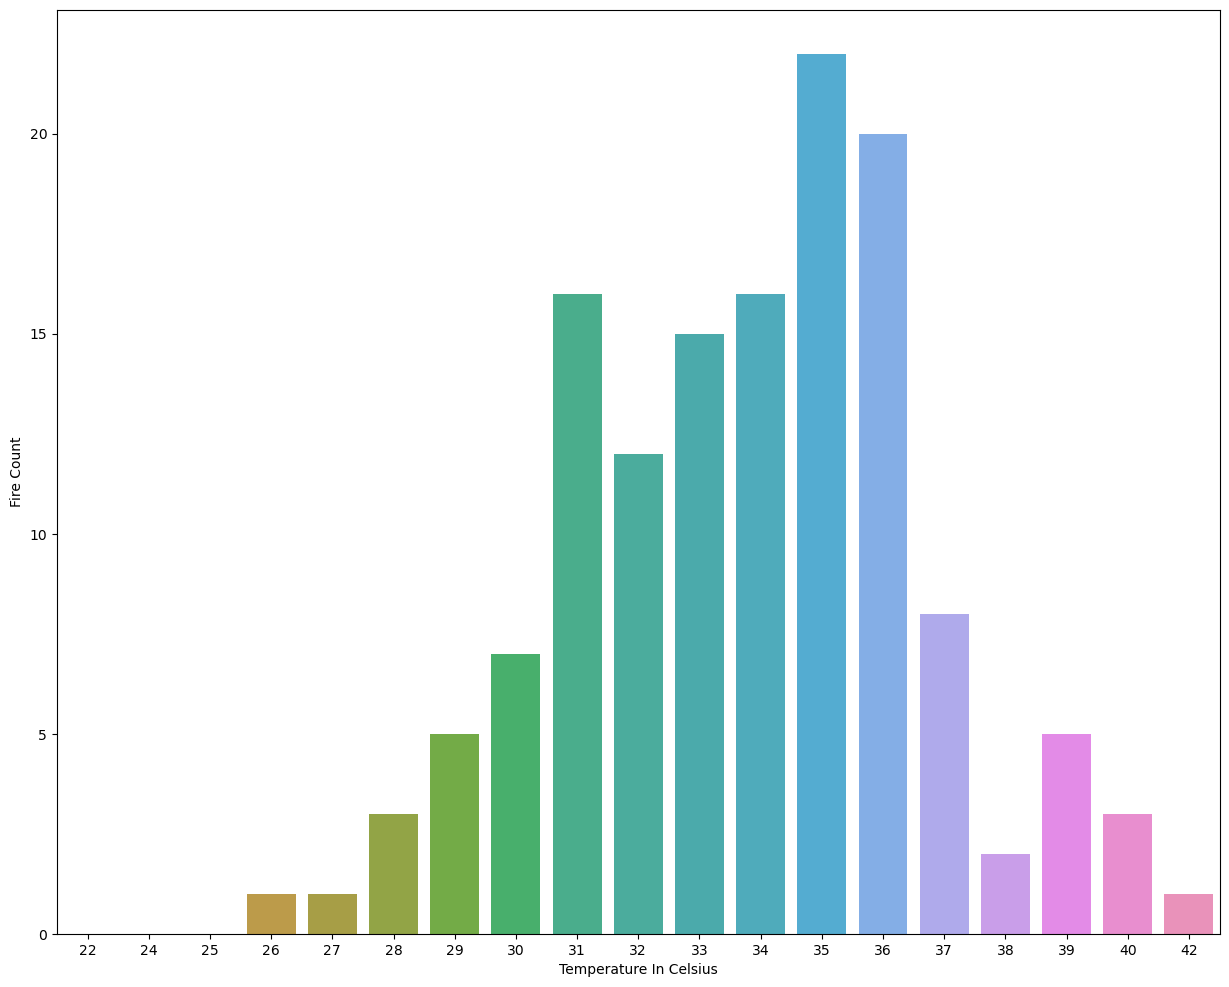

In [39]:
barchart('Temperature', 'Temperature In Celsius')

### Rain

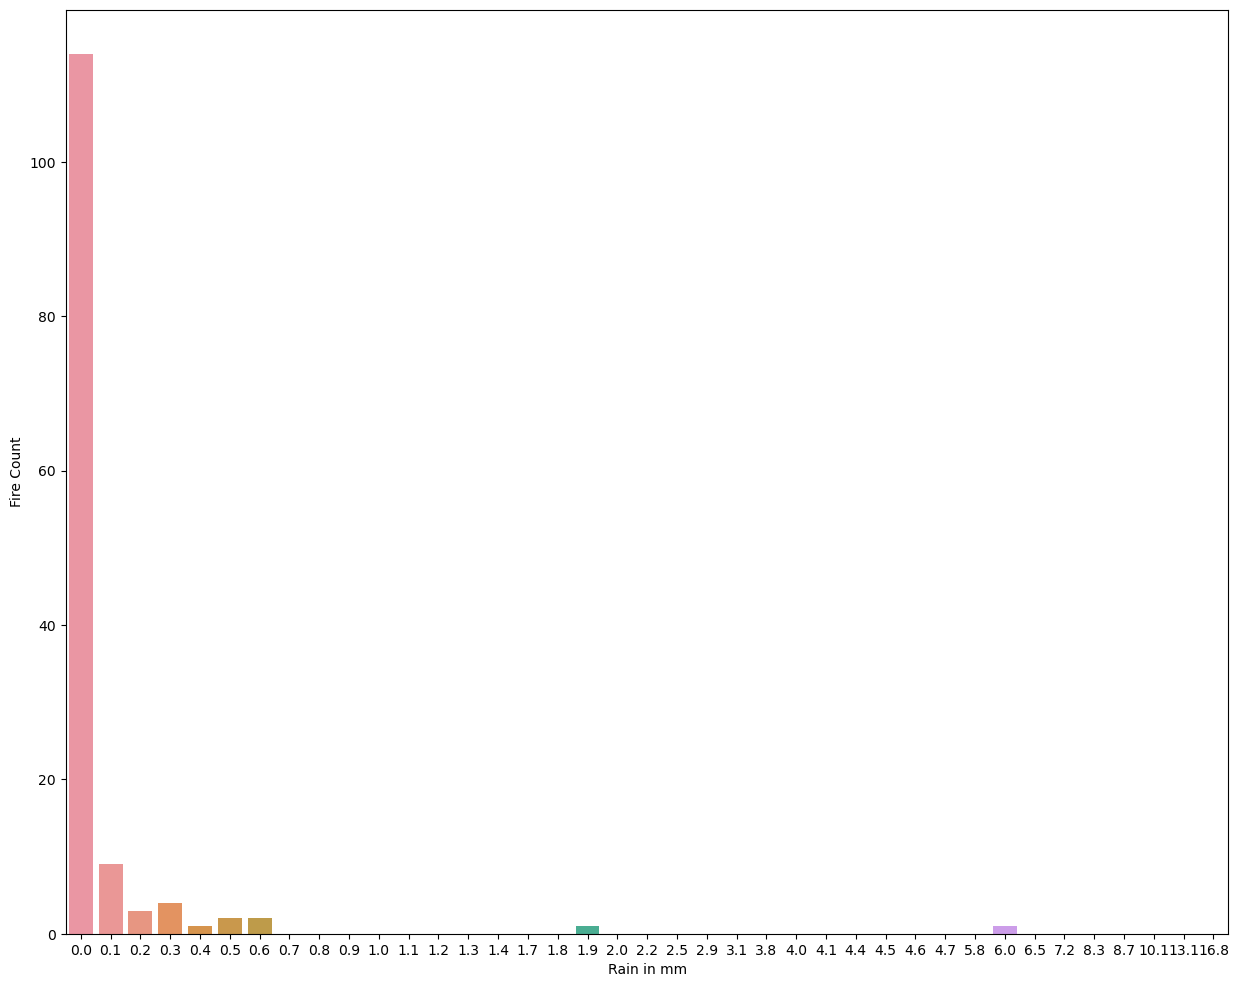

In [40]:
barchart('Rain', 'Rain in mm')

### Relative Humidity (RH)

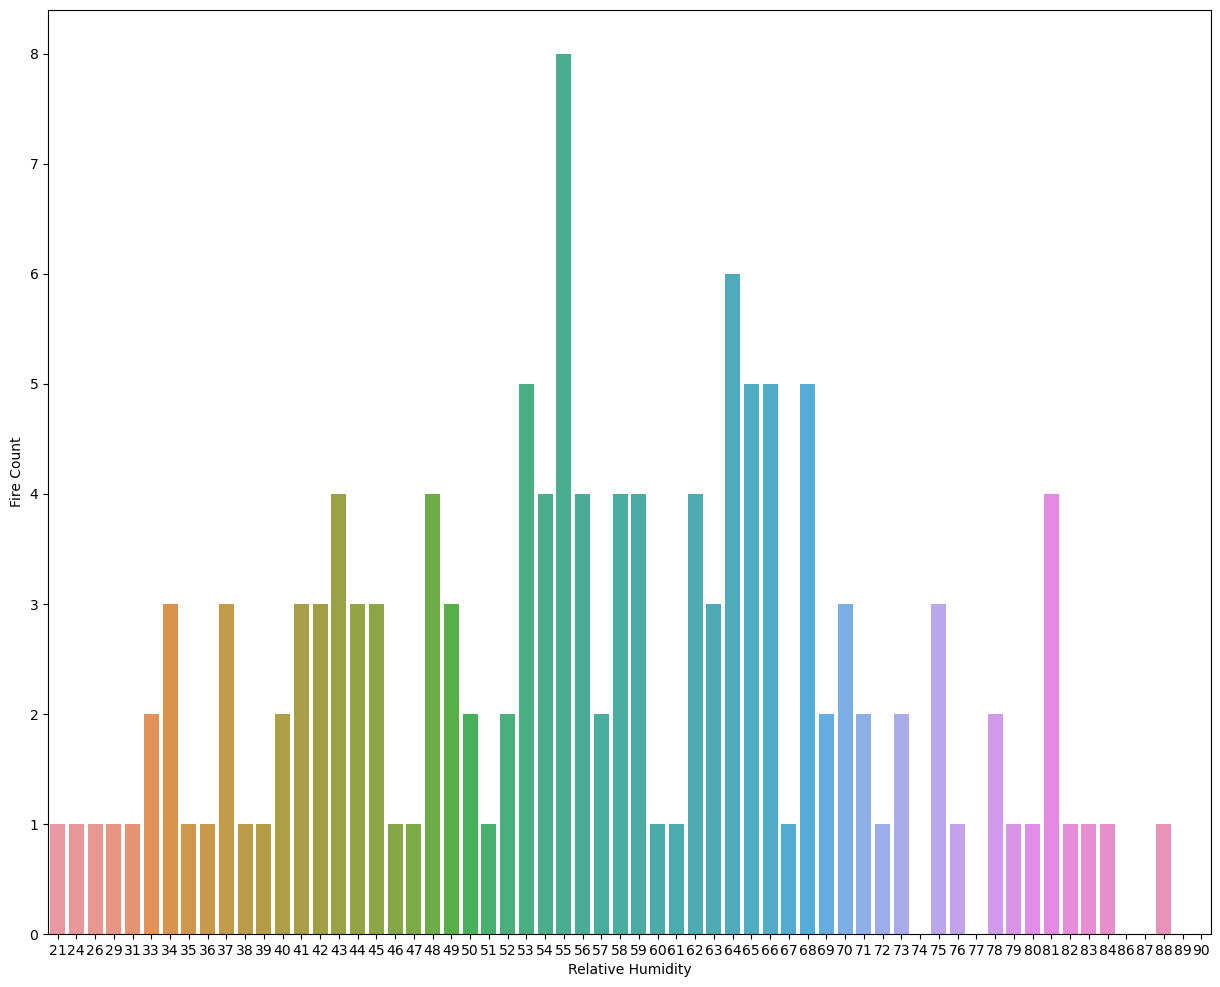

In [41]:
barchart('RH', 'Relative Humidity')

### Wind Speed (Ws)

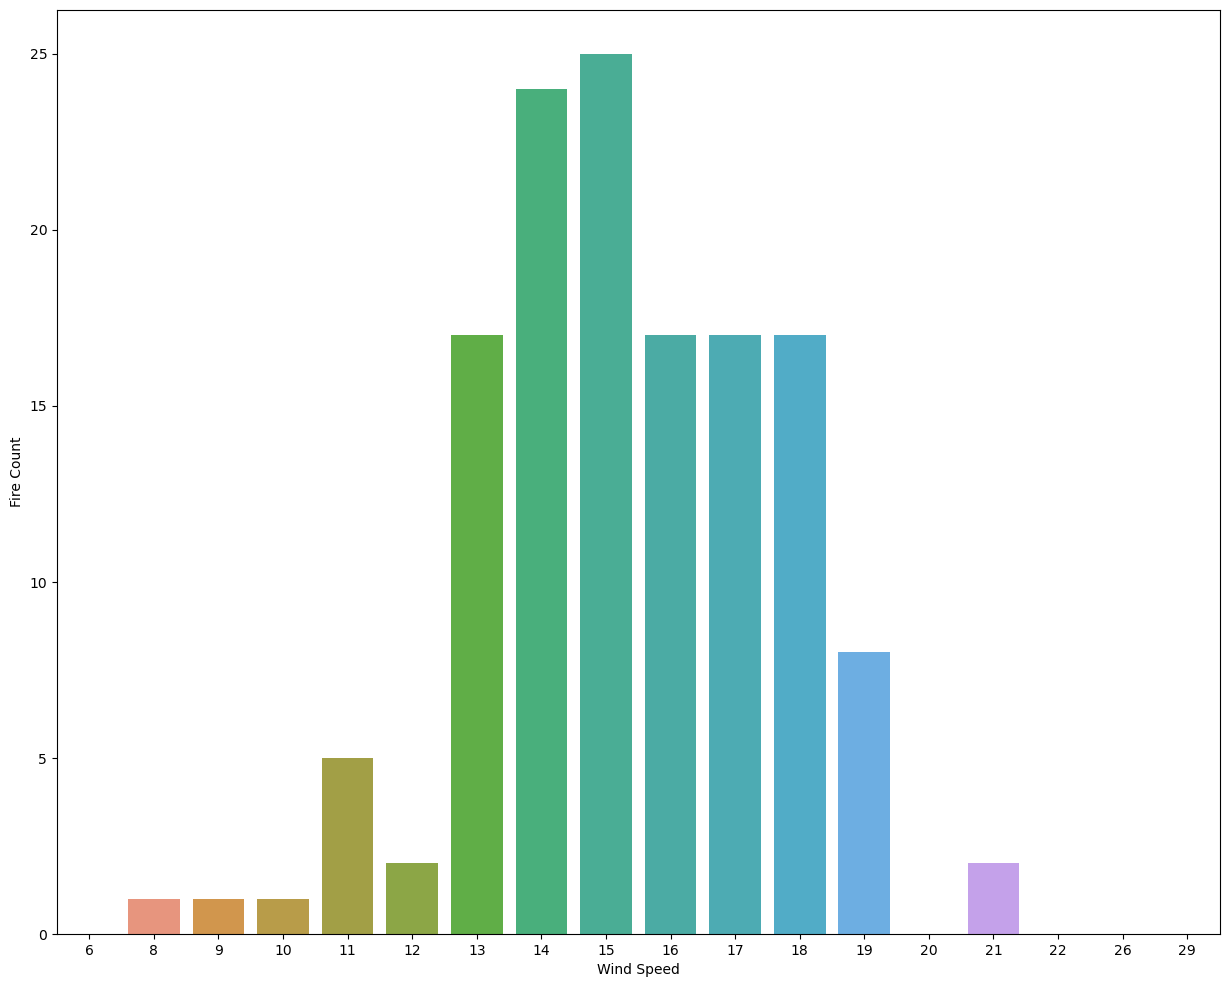

In [42]:
barchart('Ws', 'Wind Speed')

## Observations
* **Temperature:** highest number of fires happened when the temperature is around **30 to 37 degree Celsius**
* **Rain:** highest number of fires happened when there is no rain or small amount of rain around **0.0 to 0.3mm** of rain
* **Relative Humidity:** highest fire counts happened when RH is between **48 to 81%**
* **Wind Speed:** highest fire counts happened when WS is between **13 to 19 km/hr**, with the **highest at 15km/hr**

In [43]:
df2.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [44]:
def histplot(feature,xlabel):
    plt.figure(figsize=[15,12])
    sns.histplot(x=feature, data=df2, hue='Classes')
    plt.xlabel(xlabel)
    plt.legend(labels=['Fire','Not Fire'])

### Fine Fuel Moisture Code (FFMC)

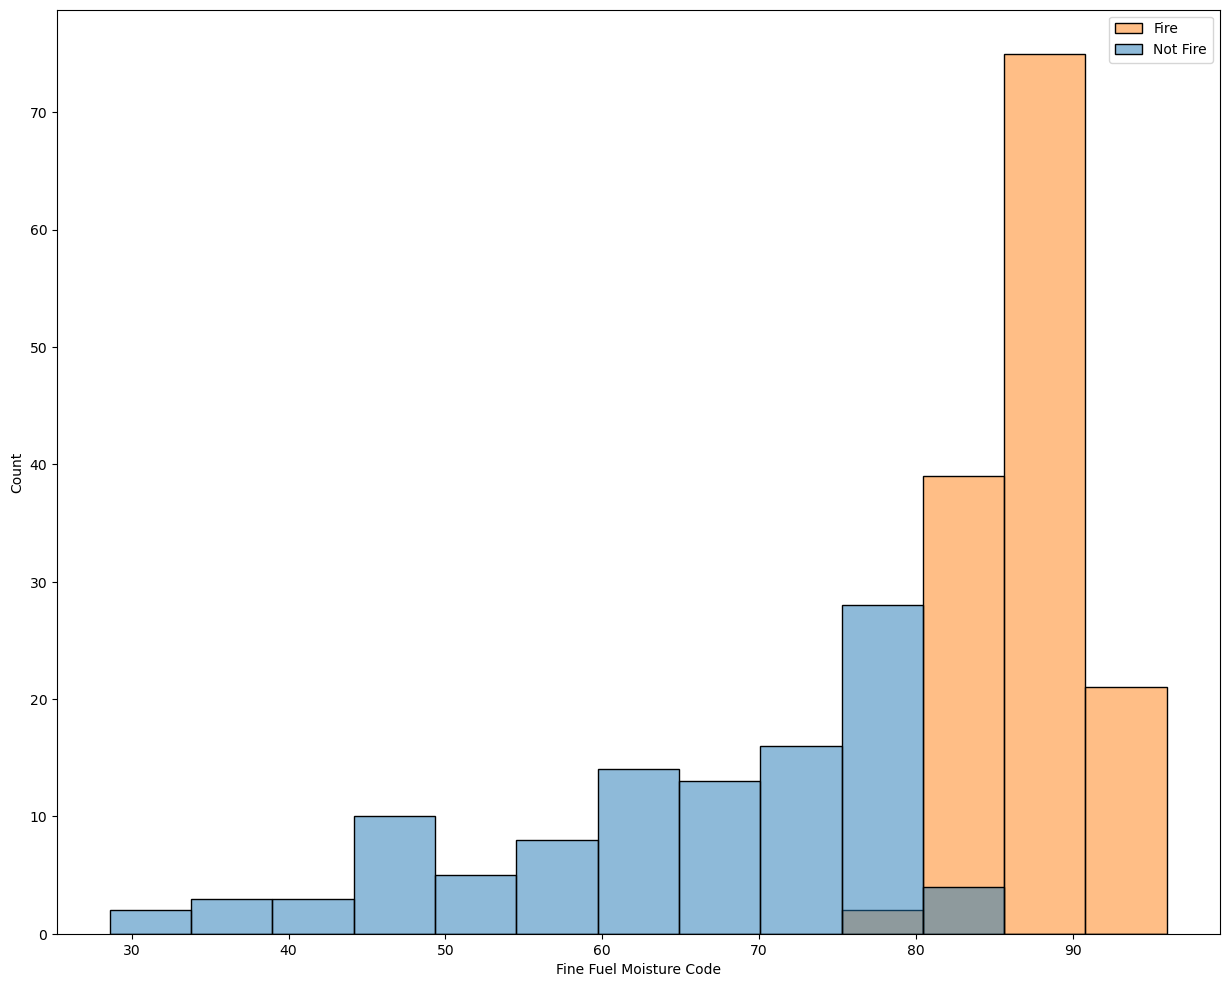

In [45]:
histplot('FFMC', 'Fine Fuel Moisture Code')

### Duff Moisture Code (DMC)

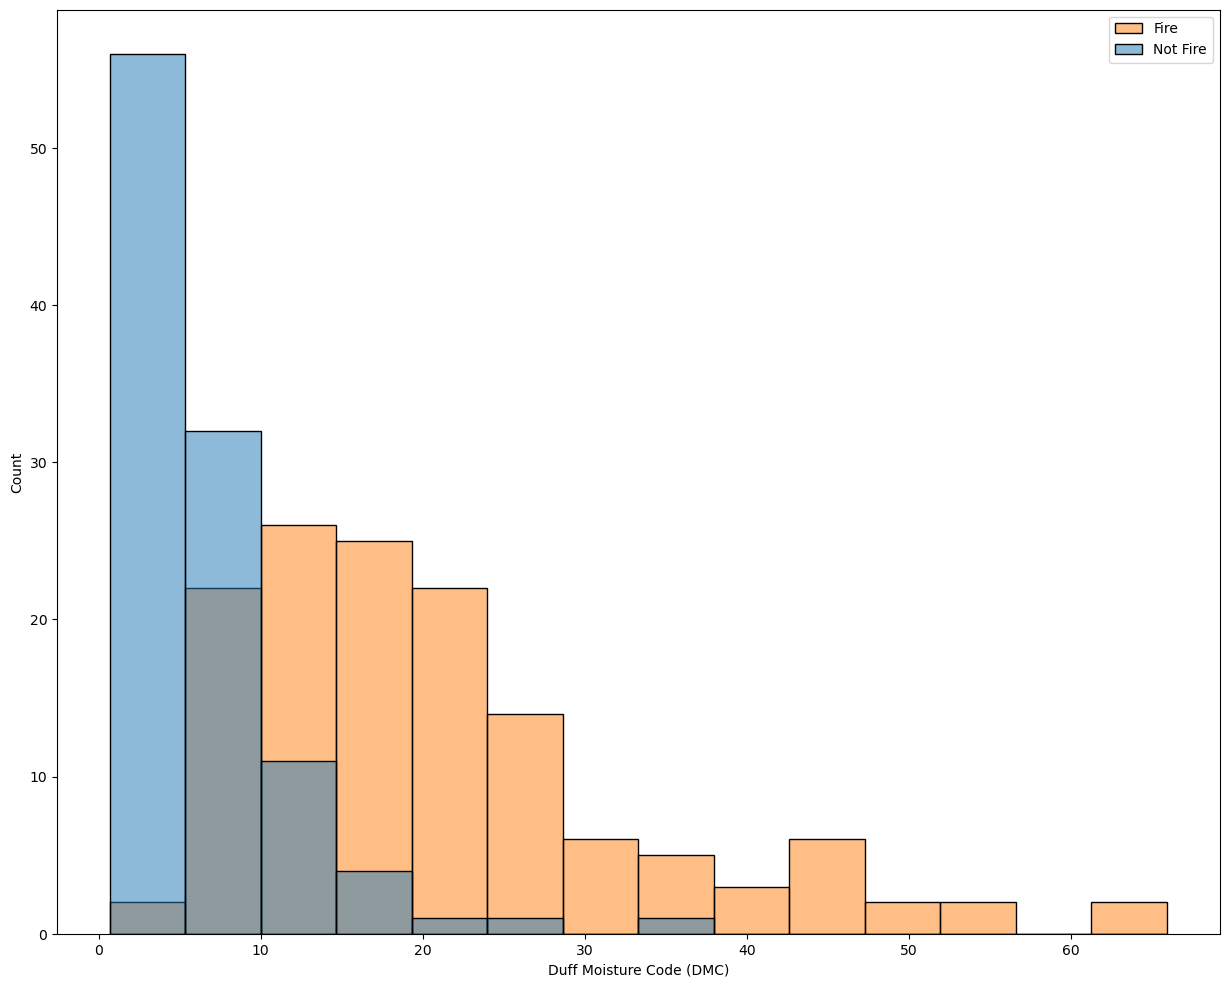

In [46]:
histplot('DMC', 'Duff Moisture Code (DMC)')

### Drought Code (DC)

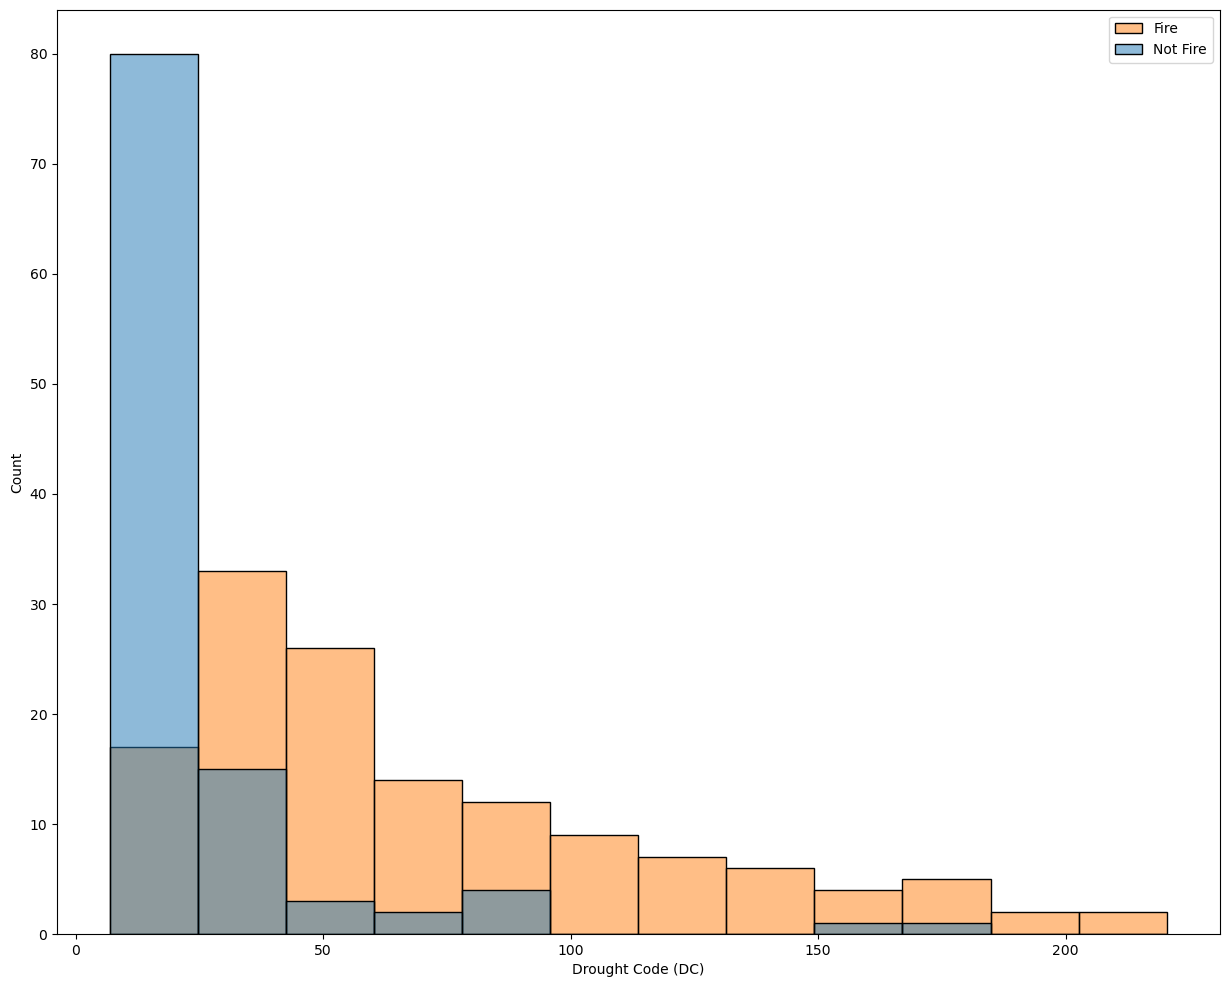

In [47]:
histplot('DC','Drought Code (DC)')

### Initial Spread Index (ISI)

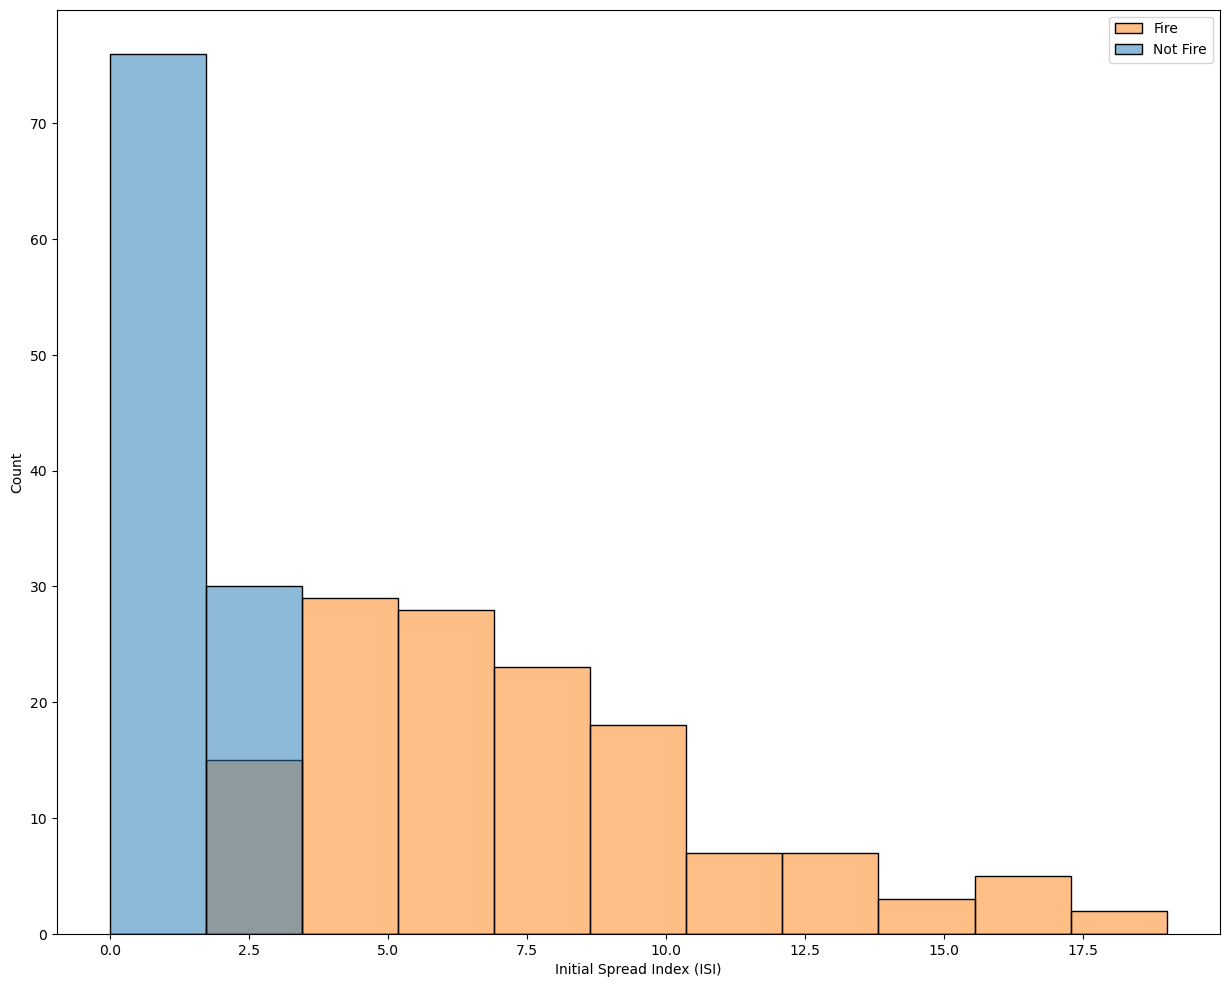

In [48]:
histplot('ISI','Initial Spread Index (ISI)')

### Buildup Index (BUI)

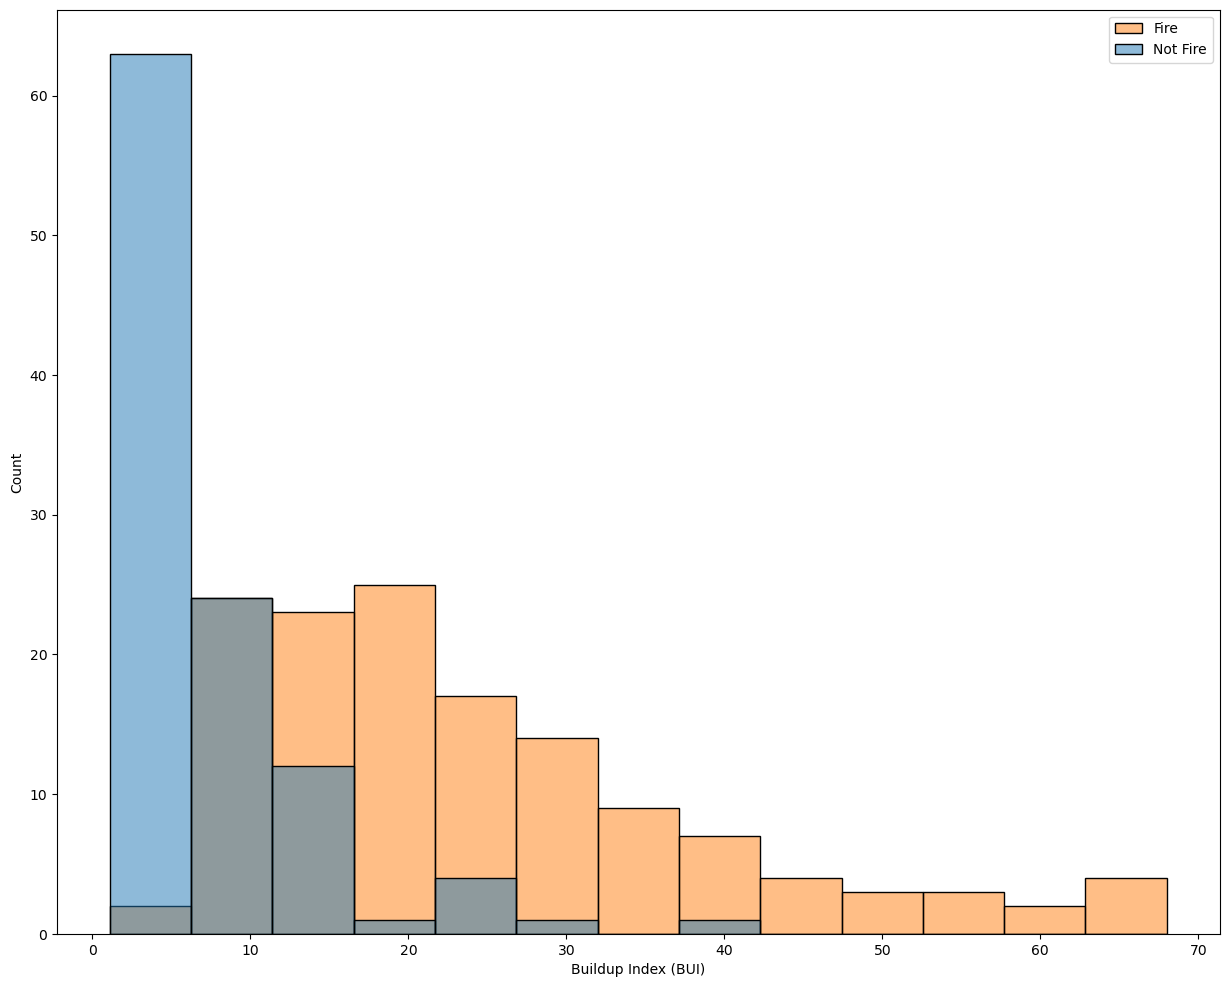

In [49]:
histplot('BUI','Buildup Index (BUI)')

### Fire Weather Index (FWI)

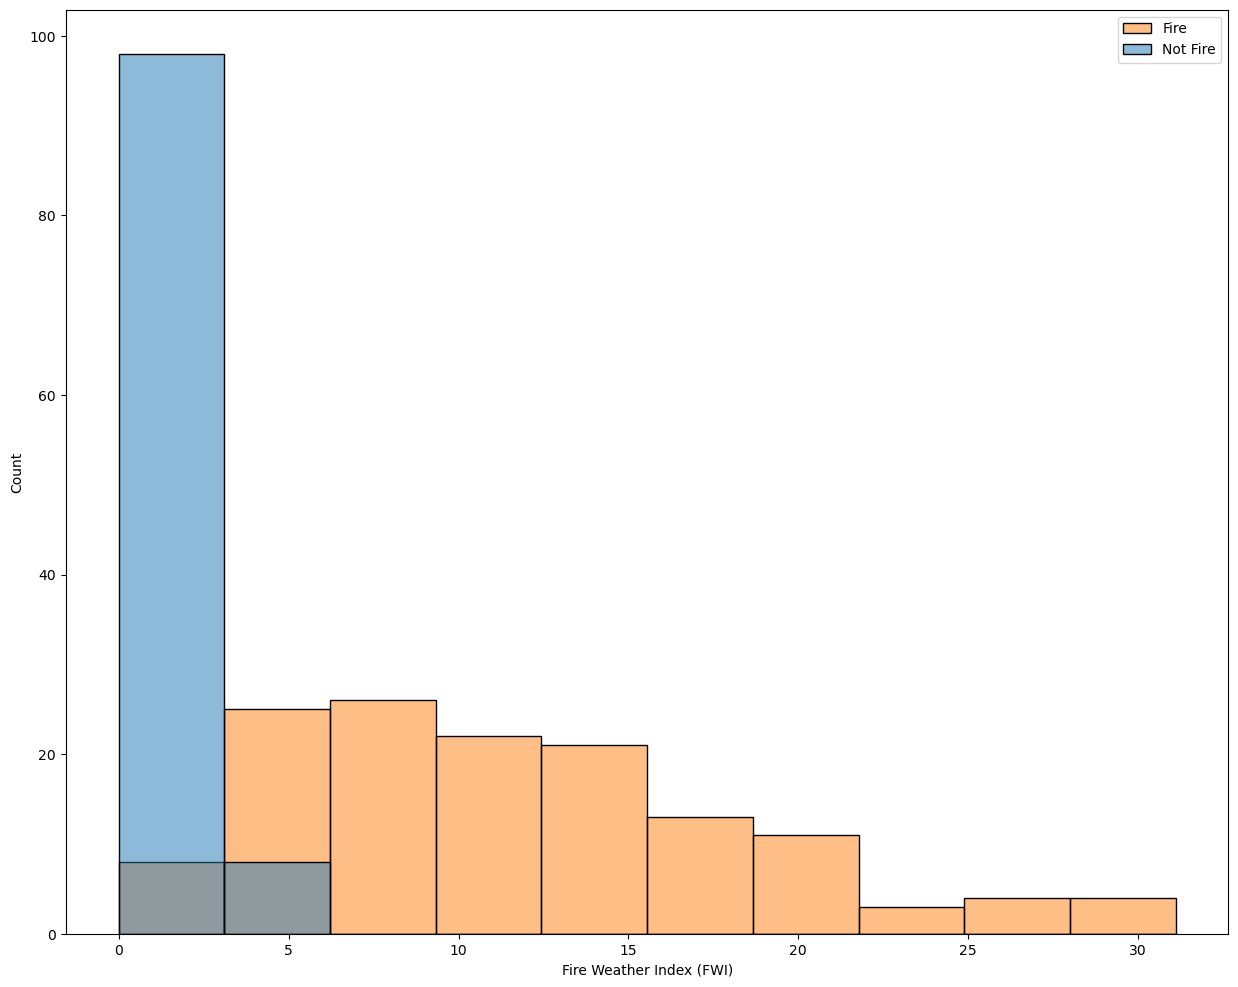

In [50]:
histplot('FWI','Fire Weather Index (FWI)')

## Observations

- **Fire Weather Index (FWI):** the highest fire counts happened when FWI is between 3 and 22, and a lower chance when FWI is between **0 and 3**
- **Buildup Index (BUI):** there is a lower chance of forest fire when BUI is between 0 and 10 and a higher chance of fire when BUI is **above 10**
- **Initial Spread Index (ISI):** there is a lower chance of fire when ISI is between 0 to 3.5 and a higher chance of fire wehn ISI is **above 3.5**
- **Drought Code (DC):** there is a lower chance of fire when DC is between 0 - 20 and a higher chance of fire when DC is **above 20**
- **Duff Moisture Code (DMC):** there is a lower chance of fire when DMC is between 0-10 and a higher chance of fire when DMC is **above 10**
- **Fine Fuel Moisture Code (FFMC):** there is a almost zero chance of fire FFMC is between 28-75 and a higher chance of fire when FFMC is **above 80**